In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
path= './drive/MyDrive/xray.zip'
!unzip './drive/MyDrive/xray.zip'


Archive:  ./drive/MyDrive/xray.zip
replace Data/test/COVID19/COVID19(460).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Data/test/COVID19/COVID19(461).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [147]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend as K
from tensorflow.keras import regularizers


In [148]:
epochs = 10
lr = 1e-2
batch_size = 32
seed = 42 

In [149]:


train_data = []
train_labels = []

test_data = []
test_labels = []

train_dataset = './Data/train'
test_dataset = './Data/test'


train_paths = sorted(list(paths.list_images(train_dataset)))
random.seed(seed)
random.shuffle(train_paths)

test_paths = sorted(list(paths.list_images(test_dataset)))
random.seed(seed)
random.shuffle(test_paths)
np.random.seed(seed)

print(train_paths)
print(test_paths)

['./Data/train/PNEUMONIA/PNEUMONIA(1832).jpg', './Data/train/PNEUMONIA/PNEUMONIA(3088).jpg', './Data/train/NORMAL/NORMAL(564).jpg', './Data/train/PNEUMONIA/PNEUMONIA(1921).jpg', './Data/train/PNEUMONIA/PNEUMONIA(1231).jpg', './Data/train/COVID19/COVID19(329).jpg', './Data/train/COVID19/COVID19(47).jpg', './Data/train/PNEUMONIA/PNEUMONIA(985).jpg', './Data/train/PNEUMONIA/PNEUMONIA(2140).jpg', './Data/train/PNEUMONIA/PNEUMONIA(2374).jpg', './Data/train/PNEUMONIA/PNEUMONIA(3207).jpg', './Data/train/COVID19/COVID19(176).jpg', './Data/train/PNEUMONIA/PNEUMONIA(3397).jpg', './Data/train/NORMAL/NORMAL(1029).jpg', './Data/train/COVID19/COVID19(426).jpg', './Data/train/PNEUMONIA/PNEUMONIA(3401).jpg', './Data/train/NORMAL/NORMAL(592).jpg', './Data/train/PNEUMONIA/PNEUMONIA(3298).jpg', './Data/train/PNEUMONIA/PNEUMONIA(690).jpg', './Data/train/PNEUMONIA/PNEUMONIA(370).jpg', './Data/train/NORMAL/NORMAL(490).jpg', './Data/train/PNEUMONIA/PNEUMONIA(2594).jpg', './Data/train/PNEUMONIA/PNEUMONIA(1655

In [150]:
for img in train_paths:
  image = cv2.imread(img)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #image = np.stack((image,)*3, axis=-1)
  image = cv2.resize(image, (80, 80))
  image = img_to_array(image)
  train_data.append(image)
  label = img.split(os.path.sep)[-2]
  
  if label == "COVID19":
    label = 0
  elif label == "NORMAL":
    label = 1
  elif label == "PNEUMONIA":
    label = 2

  train_labels.append(label)

In [151]:
for img in test_paths:
  image = cv2.imread(img)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #image = np.stack((image,)*3, axis=-1)
  image = cv2.resize(image, (80, 80))
  image = img_to_array(image)
  test_data.append(image)
  label = img.split(os.path.sep)[-2]
  
  if label == "COVID19":
    label = 0
  elif label == "NORMAL":
    label = 1
  elif label == "PNEUMONIA":
    label = 2

  test_labels.append(label)

In [152]:
print(test_labels)

[2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 

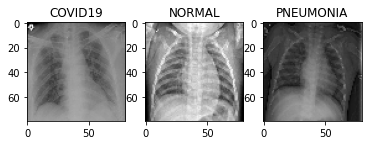

In [153]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

image = np.stack((test_data[test_labels.index(0)],)*3, axis=2).squeeze() 
image = image.astype('uint8') 
ax1.imshow(image)
ax1.set_title('COVID19')

image = np.stack((test_data[test_labels.index(1)],)*3, axis=2).squeeze() 
image = image.astype('uint8') 
ax2.imshow(image)
ax2.set_title('NORMAL')

image = np.stack((test_data[test_labels.index(2)],)*3, axis=2).squeeze() 
image = image.astype('uint8') 
ax3.imshow(image)
ax3.set_title('PNEUMONIA')

plt.show()

[0 1 2] [ 460 1266 3418]


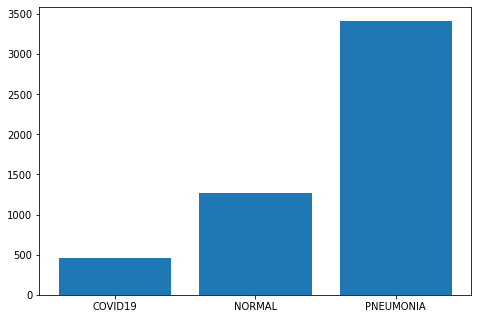

In [154]:
uniques, cnts = np.unique(train_labels, return_counts=True)
print(uniques, cnts)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ills = ['COVID19', 'NORMAL', 'PNEUMONIA']
ax.bar(ills, cnts)
plt.show()

In [155]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [156]:
train_labels_cat = to_categorical(train_labels, num_classes=3)
test_labels_cat = to_categorical(test_labels, num_classes=3)

train_data_np = np.array(train_data, dtype='float') / 255.0
train_labels_cat = np.array(train_labels_cat)

test_data_np = np.array(test_data, dtype='float') / 255.0
test_labels_cat = np.array(test_labels_cat)



In [157]:
model = Sequential()

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))

In [158]:
aug = ImageDataGenerator()

opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy", f1_m,precision_m, recall_m])




In [159]:
H = model.fit(x=aug.flow(train_data_np, train_labels_cat, batch_size=32),
	validation_data=(test_data_np, test_labels_cat), steps_per_epoch=len(train_labels) // 32,
	epochs=10, verbose=1)

Epoch 1/10
160/160 [==============================] - 2s 7ms/step - loss: 0.7000 - accuracy: 0.6924 - f1_m: 0.6700 - precision_m: 0.7216 - recall_m: 0.6518 - val_loss: 0.4565 - val_accuracy: 0.8207 - val_f1_m: 0.8150 - val_precision_m: 0.8283 - val_recall_m: 0.8026
Epoch 2/10
160/160 [==============================] - 1s 5ms/step - loss: 0.4282 - accuracy: 0.8305 - f1_m: 0.8287 - precision_m: 0.8379 - recall_m: 0.8201 - val_loss: 0.3201 - val_accuracy: 0.8804 - val_f1_m: 0.8776 - val_precision_m: 0.8875 - val_recall_m: 0.8681
Epoch 3/10
160/160 [==============================] - 1s 5ms/step - loss: 0.3572 - accuracy: 0.8636 - f1_m: 0.8626 - precision_m: 0.8705 - recall_m: 0.8551 - val_loss: 0.2255 - val_accuracy: 0.9177 - val_f1_m: 0.9208 - val_precision_m: 0.9240 - val_recall_m: 0.9177
Epoch 4/10
160/160 [==============================] - 1s 5ms/step - loss: 0.3282 - accuracy: 0.8680 - f1_m: 0.8660 - precision_m: 0.8708 - recall_m: 0.8615 - val_loss: 0.2034 - val_accuracy: 0.9293 - va

In [160]:
model_tanh = Sequential()

model_tanh.add(Flatten())
model_tanh.add(Dense(500))
model_tanh.add(Activation("tanh"))

model_tanh.add(Dense(200))
model_tanh.add(Activation("tanh"))

model_tanh.add(Dense(3))
model_tanh.add(Activation("softmax"))

In [161]:
aug = ImageDataGenerator()

opt = SGD(lr=0.01)
model_tanh.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy", f1_m,precision_m, recall_m])

H_tanh = model_tanh.fit(x=aug.flow(train_data_np, train_labels_cat, batch_size=32),
	validation_data=(test_data_np, test_labels_cat), steps_per_epoch=len(train_labels) // 32,
	epochs=10, verbose=1)


Epoch 1/10
160/160 [==============================] - 2s 6ms/step - loss: 0.7696 - accuracy: 0.7148 - f1_m: 0.6990 - precision_m: 0.7360 - recall_m: 0.6753 - val_loss: 0.2970 - val_accuracy: 0.9169 - val_f1_m: 0.9140 - val_precision_m: 0.9199 - val_recall_m: 0.9085
Epoch 2/10
160/160 [==============================] - 1s 5ms/step - loss: 0.4069 - accuracy: 0.8402 - f1_m: 0.8397 - precision_m: 0.8471 - recall_m: 0.8329 - val_loss: 0.2470 - val_accuracy: 0.9076 - val_f1_m: 0.9070 - val_precision_m: 0.9109 - val_recall_m: 0.9032
Epoch 3/10
160/160 [==============================] - 1s 5ms/step - loss: 0.3329 - accuracy: 0.8712 - f1_m: 0.8715 - precision_m: 0.8754 - recall_m: 0.8677 - val_loss: 0.2535 - val_accuracy: 0.9037 - val_f1_m: 0.9054 - val_precision_m: 0.9086 - val_recall_m: 0.9024
Epoch 4/10
160/160 [==============================] - 1s 5ms/step - loss: 0.2923 - accuracy: 0.8830 - f1_m: 0.8825 - precision_m: 0.8858 - recall_m: 0.8793 - val_loss: 0.2823 - val_accuracy: 0.8936 - va

relu yields better result than tanh since it usually covnerges several times faster than other activation functions. Moreover, relu is less computationally expensive since it requires simpler mathematical operations. From now on, I will use relu version.

Relu may lead to the dying relu phenomenon since the neurons that produce negative values will enter the dead zone and their gradient will be 0. Therefore a large part of the network will be passive. The solution is using the leakyrelu instead the normal one.

momentum accumulates the gradient of the previous steps. This added term to the optimization problem, will be multiplied by the coefficient of momentum. Momentum helps to avoid the zig-zag path which noramlly would be taken by the simple gradient decent method, thus the model would converge faster.



In [162]:
model = Sequential()

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))
opt = SGD(lr=0.01, momentum=0.5)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy", f1_m,precision_m, recall_m])

H = model.fit(x=aug.flow(train_data_np, train_labels_cat, batch_size=32),
	validation_data=(test_data_np, test_labels_cat), steps_per_epoch=len(train_labels) // 32,
	epochs=10, verbose=1)


Epoch 1/10
160/160 [==============================] - 2s 6ms/step - loss: 0.6307 - accuracy: 0.7381 - f1_m: 0.7132 - precision_m: 0.7480 - recall_m: 0.6903 - val_loss: 0.2968 - val_accuracy: 0.8703 - val_f1_m: 0.8698 - val_precision_m: 0.8739 - val_recall_m: 0.8659
Epoch 2/10
160/160 [==============================] - 1s 5ms/step - loss: 0.3317 - accuracy: 0.8752 - f1_m: 0.8755 - precision_m: 0.8813 - recall_m: 0.8699 - val_loss: 0.2184 - val_accuracy: 0.9262 - val_f1_m: 0.9255 - val_precision_m: 0.9280 - val_recall_m: 0.9230
Epoch 3/10
160/160 [==============================] - 1s 5ms/step - loss: 0.2987 - accuracy: 0.8895 - f1_m: 0.8893 - precision_m: 0.8930 - recall_m: 0.8857 - val_loss: 0.2457 - val_accuracy: 0.9239 - val_f1_m: 0.9242 - val_precision_m: 0.9343 - val_recall_m: 0.9146
Epoch 4/10
160/160 [==============================] - 1s 5ms/step - loss: 0.3020 - accuracy: 0.8773 - f1_m: 0.8786 - precision_m: 0.8824 - recall_m: 0.8751 - val_loss: 0.1870 - val_accuracy: 0.9340 - va

In [163]:
model = Sequential()

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy", f1_m,precision_m, recall_m])

H = model.fit(x=aug.flow(train_data_np, train_labels_cat, batch_size=32),
	validation_data=(test_data_np, test_labels_cat), steps_per_epoch=len(train_labels) // 32,
	epochs=10, verbose=1)

Epoch 1/10
160/160 [==============================] - 2s 7ms/step - loss: 0.7710 - accuracy: 0.6939 - f1_m: 0.6807 - precision_m: 0.7034 - recall_m: 0.6681 - val_loss: 0.2408 - val_accuracy: 0.9014 - val_f1_m: 0.9042 - val_precision_m: 0.9085 - val_recall_m: 0.9002
Epoch 2/10
160/160 [==============================] - 1s 5ms/step - loss: 0.3348 - accuracy: 0.8736 - f1_m: 0.8741 - precision_m: 0.8790 - recall_m: 0.8694 - val_loss: 0.2041 - val_accuracy: 0.9286 - val_f1_m: 0.9284 - val_precision_m: 0.9317 - val_recall_m: 0.9253
Epoch 3/10
160/160 [==============================] - 1s 5ms/step - loss: 0.2773 - accuracy: 0.8997 - f1_m: 0.9000 - precision_m: 0.9027 - recall_m: 0.8974 - val_loss: 0.3689 - val_accuracy: 0.8486 - val_f1_m: 0.8511 - val_precision_m: 0.8655 - val_recall_m: 0.8377
Epoch 4/10
160/160 [==============================] - 1s 5ms/step - loss: 0.3132 - accuracy: 0.8755 - f1_m: 0.8747 - precision_m: 0.8793 - recall_m: 0.8703 - val_loss: 0.1920 - val_accuracy: 0.9332 - va

In [164]:
model = Sequential()

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))
opt = SGD(lr=0.01, momentum=0.99)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy", f1_m,precision_m, recall_m])

H = model.fit(x=aug.flow(train_data_np, train_labels_cat, batch_size=32),
	validation_data=(test_data_np, test_labels_cat), steps_per_epoch=len(train_labels) // 32,
	epochs=10, verbose=1)

Epoch 1/10
160/160 [==============================] - 2s 6ms/step - loss: 1.1788 - accuracy: 0.6199 - f1_m: 0.5984 - precision_m: 0.6159 - recall_m: 0.5890 - val_loss: 0.9822 - val_accuracy: 0.8579 - val_f1_m: 0.8582 - val_precision_m: 0.8582 - val_recall_m: 0.8582
Epoch 2/10
160/160 [==============================] - 1s 5ms/step - loss: 0.7109 - accuracy: 0.7933 - f1_m: 0.7812 - precision_m: 0.7981 - recall_m: 0.7718 - val_loss: 0.8444 - val_accuracy: 0.6638 - val_f1_m: 0.6608 - val_precision_m: 0.6608 - val_recall_m: 0.6608
Epoch 3/10
160/160 [==============================] - 1s 5ms/step - loss: 0.8404 - accuracy: 0.6722 - f1_m: 0.6723 - precision_m: 0.6723 - recall_m: 0.6723 - val_loss: 0.8409 - val_accuracy: 0.6638 - val_f1_m: 0.6608 - val_precision_m: 0.6608 - val_recall_m: 0.6608
Epoch 4/10
160/160 [==============================] - 1s 5ms/step - loss: 0.8278 - accuracy: 0.6734 - f1_m: 0.6735 - precision_m: 0.6735 - recall_m: 0.6735 - val_loss: 0.8339 - val_accuracy: 0.6638 - va

As you see, an extremly high value of momentum disrupts the convergence process since it puts too much weight to the direction of the first gradient which is not generally accurate. However a moderate use of this parameter can make the model to converge faster.

In [165]:
model = Sequential()

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))
opt = Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy", f1_m,precision_m, recall_m])

H = model.fit(x=aug.flow(train_data_np, train_labels_cat, batch_size=32),
	validation_data=(test_data_np, test_labels_cat), steps_per_epoch=len(train_labels) // 32,
	epochs=10, verbose=1)

Epoch 1/10
160/160 [==============================] - 2s 7ms/step - loss: 1.4460 - accuracy: 0.7154 - f1_m: 0.7000 - precision_m: 0.7136 - recall_m: 0.6909 - val_loss: 0.2549 - val_accuracy: 0.9053 - val_f1_m: 0.9071 - val_precision_m: 0.9095 - val_recall_m: 0.9047
Epoch 2/10
160/160 [==============================] - 1s 6ms/step - loss: 0.3024 - accuracy: 0.8852 - f1_m: 0.8848 - precision_m: 0.8885 - recall_m: 0.8812 - val_loss: 0.2244 - val_accuracy: 0.9154 - val_f1_m: 0.9155 - val_precision_m: 0.9180 - val_recall_m: 0.9131
Epoch 3/10
160/160 [==============================] - 1s 6ms/step - loss: 0.3011 - accuracy: 0.8826 - f1_m: 0.8836 - precision_m: 0.8882 - recall_m: 0.8793 - val_loss: 0.2316 - val_accuracy: 0.9123 - val_f1_m: 0.9104 - val_precision_m: 0.9115 - val_recall_m: 0.9093
Epoch 4/10
160/160 [==============================] - 1s 6ms/step - loss: 0.2653 - accuracy: 0.9048 - f1_m: 0.9054 - precision_m: 0.9089 - recall_m: 0.9020 - val_loss: 0.3199 - val_accuracy: 0.8797 - va

SGD provided higher accuracy and f1 score in comparison with Adam. Adam's f1 score did not go higher than 0.85 while in SGD's case, I obtained 0.92 score. 

In [166]:
model = Sequential()

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))
opt = Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy", f1_m,precision_m, recall_m])

H = model.fit(x=aug.flow(train_data_np, train_labels_cat, batch_size=32),
	validation_data=(test_data_np, test_labels_cat), steps_per_epoch=len(train_labels) // 32,
	epochs=20, verbose=1)


Epoch 1/20
160/160 [==============================] - 2s 7ms/step - loss: 0.9884 - accuracy: 0.6917 - f1_m: 0.6920 - precision_m: 0.6975 - recall_m: 0.6871 - val_loss: 0.3266 - val_accuracy: 0.8750 - val_f1_m: 0.8771 - val_precision_m: 0.8817 - val_recall_m: 0.8727
Epoch 2/20
160/160 [==============================] - 1s 5ms/step - loss: 0.3147 - accuracy: 0.8832 - f1_m: 0.8827 - precision_m: 0.8877 - recall_m: 0.8778 - val_loss: 0.2353 - val_accuracy: 0.9107 - val_f1_m: 0.9103 - val_precision_m: 0.9113 - val_recall_m: 0.9093
Epoch 3/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2853 - accuracy: 0.8902 - f1_m: 0.8900 - precision_m: 0.8932 - recall_m: 0.8870 - val_loss: 0.1952 - val_accuracy: 0.9286 - val_f1_m: 0.9281 - val_precision_m: 0.9310 - val_recall_m: 0.9253
Epoch 4/20
160/160 [==============================] - 1s 5ms/step - loss: 0.3213 - accuracy: 0.8767 - f1_m: 0.8760 - precision_m: 0.8793 - recall_m: 0.8728 - val_loss: 0.2033 - val_accuracy: 0.9239 - va

The higher the number of the epochs is, the more the parameters of the model will be adjusted, increasing the generalization ability of the model. No, training more than one epochs is not always required especially when we have a large training dataset. However, a very high number of epochs actually is counter productive since it decreases the ability of the model to generalize on the data, other than the ones in dataset thus, the model will be overfitted on the training data. The point in time in which, the traning loss continues to decrease while on the other hand, the validation loss starts to increase, overfitting occures. There are several ways to mitigate overfitting such as changing the compelxity of the model, using the dropouts and having a lower amount of epochs.

In [167]:
model = Sequential()

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))
opt = Adam(lr=0.001)
model.compile(loss="mse", optimizer=opt,
	metrics=["accuracy", f1_m,precision_m, recall_m])

H = model.fit(x=aug.flow(train_data_np, train_labels_cat, batch_size=32),
	validation_data=(test_data_np, test_labels_cat), steps_per_epoch=len(train_labels) // 32,
	epochs=20, verbose=1)


Epoch 1/20
160/160 [==============================] - 2s 6ms/step - loss: 0.2331 - accuracy: 0.6251 - f1_m: 0.6220 - precision_m: 0.6220 - recall_m: 0.6220 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_f1_m: 0.6608 - val_precision_m: 0.6608 - val_recall_m: 0.6608
Epoch 2/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2296 - accuracy: 0.6556 - f1_m: 0.6558 - precision_m: 0.6558 - recall_m: 0.6558 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_f1_m: 0.6608 - val_precision_m: 0.6608 - val_recall_m: 0.6608
Epoch 3/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2184 - accuracy: 0.6723 - f1_m: 0.6724 - precision_m: 0.6724 - recall_m: 0.6724 - val_loss: 0.2241 - val_accuracy: 0.6638 - val_f1_m: 0.6608 - val_precision_m: 0.6608 - val_recall_m: 0.6608
Epoch 4/20
160/160 [==============================] - 1s 5ms/step - loss: 0.2260 - accuracy: 0.6611 - f1_m: 0.6613 - precision_m: 0.6613 - recall_m: 0.6613 - val_loss: 0.2241 - val_accuracy: 0.6638 - va

The MSE function assumes that our data are generated from a bell-shaped distribution like normal, however, in classification, the underlying distribution is bernoli. The second reason that the mse function does not produce a satisfactory result is that the mse function is non-convex for classification problems. Therefore, there is no guarantee of the covnergence. This is because the MSE function expects inputs from -inf to inf while in classification, outputs are probablilities in 0-1 range. We can use MSE in other types of machine learning problems such as regression.

In [168]:

model = Sequential()

model.add(Flatten())
model.add(Dense(500, kernel_regularizer=regularizers.l2(1e-4), bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-4)))
model.add(Activation("relu"))

model.add(Dense(200, kernel_regularizer=regularizers.l2(1e-4), bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-4)))
model.add(Activation("relu"))

model.add(Dense(3, kernel_regularizer=regularizers.l2(1e-4), bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-4)))
model.add(Activation("softmax"))

opt = Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy", f1_m,precision_m, recall_m])

H = model.fit(x=aug.flow(train_data_np, train_labels_cat, batch_size=32),
 validation_data=(test_data_np, test_labels_cat), steps_per_epoch=len(train_labels) // 32, 
 epochs=20, verbose=1)


Epoch 1/20
160/160 [==============================] - 2s 8ms/step - loss: 2.9420 - accuracy: 0.7180 - f1_m: 0.7016 - precision_m: 0.7215 - recall_m: 0.6967 - val_loss: 0.6127 - val_accuracy: 0.9030 - val_f1_m: 0.9052 - val_precision_m: 0.9080 - val_recall_m: 0.9024
Epoch 2/20
160/160 [==============================] - 1s 6ms/step - loss: 0.7279 - accuracy: 0.8717 - f1_m: 0.8711 - precision_m: 0.8760 - recall_m: 0.8665 - val_loss: 0.5477 - val_accuracy: 0.9317 - val_f1_m: 0.9328 - val_precision_m: 0.9342 - val_recall_m: 0.9314
Epoch 3/20
160/160 [==============================] - 1s 6ms/step - loss: 0.5701 - accuracy: 0.9006 - f1_m: 0.9007 - precision_m: 0.9039 - recall_m: 0.8975 - val_loss: 0.5195 - val_accuracy: 0.9278 - val_f1_m: 0.9292 - val_precision_m: 0.9356 - val_recall_m: 0.9230
Epoch 4/20
160/160 [==============================] - 1s 6ms/step - loss: 0.5916 - accuracy: 0.9064 - f1_m: 0.9049 - precision_m: 0.9084 - recall_m: 0.9015 - val_loss: 0.4918 - val_accuracy: 0.9270 - va

In [169]:
model = Sequential()

model.add(Flatten())
model.add(Dense(500, kernel_regularizer=regularizers.l2(1e-4), bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-4)))
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(200, kernel_regularizer=regularizers.l2(1e-4), bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-4)))
model.add(Activation("relu"))

model.add(Dense(3, kernel_regularizer=regularizers.l2(1e-4), bias_regularizer=regularizers.l2(1e-4), activity_regularizer=regularizers.l2(1e-4)))
model.add(Activation("softmax"))

opt = Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy", f1_m,precision_m, recall_m])

H = model.fit(x=aug.flow(train_data_np, train_labels_cat, batch_size=32),
 validation_data=(test_data_np, test_labels_cat), steps_per_epoch=len(train_labels) // 32, 
 epochs=20, verbose=1)


Epoch 1/20
160/160 [==============================] - 2s 8ms/step - loss: 2.5449 - accuracy: 0.6881 - f1_m: 0.6825 - precision_m: 0.6915 - recall_m: 0.6764 - val_loss: 0.9790 - val_accuracy: 0.8121 - val_f1_m: 0.8112 - val_precision_m: 0.8137 - val_recall_m: 0.8087
Epoch 2/20
160/160 [==============================] - 1s 6ms/step - loss: 0.7928 - accuracy: 0.8574 - f1_m: 0.8557 - precision_m: 0.8612 - recall_m: 0.8505 - val_loss: 0.6871 - val_accuracy: 0.8921 - val_f1_m: 0.8944 - val_precision_m: 0.8972 - val_recall_m: 0.8918
Epoch 3/20
160/160 [==============================] - 1s 6ms/step - loss: 0.7243 - accuracy: 0.8775 - f1_m: 0.8770 - precision_m: 0.8800 - recall_m: 0.8741 - val_loss: 0.5147 - val_accuracy: 0.9348 - val_f1_m: 0.9350 - val_precision_m: 0.9379 - val_recall_m: 0.9322
Epoch 4/20
160/160 [==============================] - 1s 6ms/step - loss: 0.6098 - accuracy: 0.8977 - f1_m: 0.8973 - precision_m: 0.9010 - recall_m: 0.8938 - val_loss: 0.6181 - val_accuracy: 0.8929 - va

It results in better validation accurace and f1-score since regularization methods prevent the weight, becomming to big therefore the model can better generalize.